# Open Street Map Example

This example shows how to use the Open Street Map data block with the UP42 Python SDK. This block enables use of the OSM vector layers (e.g. streets, water bodies, building footprints etc) with UP42. We use the UP42 SDK and geopandas to query and visualize mapped [public bookcases](https://en.wikipedia.org/wiki/Public_bookcase) in Brooklyn, New York City. 

In the example, the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/df2ec03a-50c4-47ac-8a83-2db613869cf9) and [Documentation](https://docs.up42.com/up42-blocks/data/openstreetmap.html).

In [77]:
import up42
import geopandas as gpd
import requests

In [8]:
up42.authenticate(project_id="12345", 
                  project_api_key="12345")
project = up42.initialize_project()

2021-03-12 01:32:27,636 - Authentication with UP42 successful!
2021-03-12 01:32:28,408 - Initialized Project(name: sdk-test, project_id: 6df5f59e-706d-4102-a136-b83b87c6006c, description: , createdAt: 2021-03-05T14:27:13.550603Z)


In [11]:
# Construct the workflow
workflow = project.create_workflow(name="Open Street Map - Example", use_existing=True)
workflow.add_workflow_tasks(input_tasks=["OpenStreetMap"])

2021-03-12 01:36:10,385 - Getting existing workflows in project ...
2021-03-12 01:36:10,742 - Got 5 workflows for project 6df5f59e-706d-4102-a136-b83b87c6006c.
100%|██████████| 5/5 [00:01<00:00,  2.71it/s]
2021-03-12 01:36:12,587 - Using existing workflow: Open Street Map - Example - 2c25924c-315d-4026-802b-caae51c0fcac
2021-03-12 01:36:15,543 - Added tasks to workflow: [{'name': 'openstreetmap:1', 'parentName': None, 'blockId': 'df2ec03a-50c4-47ac-8a83-2db613869cf9'}]


<AxesSubplot:>

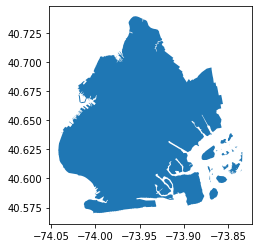

In [133]:
# Query the NYC Brooklyn administrative boundaries from the NYC city planning data portal (https://www1.nyc.gov/site/planning/index.page)
ny_admin_boundaries = "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Borough_Boundary/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson"
data = requests.get(ny_admin_boundaries).json()
df_ny = gpd.GeoDataFrame.from_features(data["features"], crs="EPSG:4326")
df_brooklyn = df_ny[df_ny["BoroName"] == "Brooklyn"]
df_brooklyn.plot()

In [135]:
# Define the aoi and input parameters of the workflow to run it.
# Even though the Openstreetmap block only accepts a bounding box geometry, we can just pass the GeoDataFrame here as the 
# `geometry` argument and select the `geometry_operation` as `bbox`. The function will take care of transforming the geometry, 
# see the resulting block input parameters.
input_parameters = workflow.construct_parameters(geometry=df_brooklyn, 
                                                 geometry_operation="bbox", 
                                                 start_date="2018-01-01",
                                                 end_date="2021-12-31",
                                                 limit=1)

# Set OSM search tags to query public bookcases, see this list of possible OSM tags https://wiki.openstreetmap.org/wiki/Map_features#Financial
input_parameters["openstreetmap:1"]["osm_tags"] = ["amenity=public_bookcase"]
input_parameters

{'openstreetmap:1': {'time': '2018-01-01T00:00:00Z/2021-12-31T23:59:59Z',
  'osm_tags': ['amenity=public_bookcase'],
  'limit': 1,
  'bbox': [-74.041898061485,
   40.5695382231083,
   -73.8335606279059,
   40.7391362162605]}}

In [140]:
# Price estimation
estimate = workflow.estimate_job(input_parameters)

2021-03-12 02:29:34,362 - Estimated: 1-1 Credits, Duration: 0-0 min.


In [137]:
# Run the workflow, download and visualize the results.
job = workflow.run_job(input_parameters=input_parameters, track_status=True)

2021-03-12 02:27:13,898 - Selected input_parameters: {'openstreetmap:1': {'time': '2018-01-01T00:00:00Z/2021-12-31T23:59:59Z', 'osm_tags': ['amenity=public_bookcase'], 'limit': 1, 'bbox': [-74.041898061485, 40.5695382231083, -73.8335606279059, 40.7391362162605]}}
2021-03-12 02:27:18,983 - Created and running new job: c0396ad8-1a32-463a-876e-534eea2345cb.
2021-03-12 02:27:19,362 - Tracking job status continuously, reporting every 30 seconds...
2021-03-12 02:27:41,315 - Job finished successfully! - c0396ad8-1a32-463a-876e-534eea2345cb


In [139]:
job.download_results()
job.map_results()